In [ ]:
# Comparative Analysis of OCR Tools
# Tesseract vs Pyocr vs Paddleocr

In [ ]:
!pip install pyocr -q
!sudo apt install tesseract-ocr -q
!pip install pytesseract -q
!pip install easyocr -q
!pip install paddlepaddle -q
!pip install paddleocr -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.7 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,800 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the

In [ ]:
# Import libraries
import PIL.Image
import pyocr
import pyocr.builders
from paddleocr import PaddleOCR
import pytesseract
import cv2
import time
from difflib import SequenceMatcher
from matplotlib import pyplot as plt

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(reference, extracted):
    """
    Calculates accuracy as the similarity ratio between reference and extracted text.
    """
    return SequenceMatcher(None, reference, extracted).ratio()


In [ ]:
# Tesseract OCR
def extract_text_with_tesseract(image_path):
    """
    Extracts text from an image using Tesseract OCR.
    """
    try:
        image = cv2.imread(image_path)
        start_time = time.time()
        extracted_text = pytesseract.image_to_string(image)
        end_time = time.time()
        time_taken = end_time - start_time
        return extracted_text.strip(), time_taken
    except Exception as e:
        return f"Error occurred: {str(e)}", 0


In [ ]:
# Initialize the PyOCR engine
tools = pyocr.get_available_tools()
if len(tools) == 0:
  print("No OCR tool found.")
exit(1)
ocr_tool = tools[0]


In [ ]:
# PyOCR
def extract_text_with_pyocr(image_path):
    """
    Extracts text from an image using PyOCR.
    """
    try:
        image = PIL.Image.open(image_path)
        start_time = time.time()
        extracted_text = ocr_tool.image_to_string(image, builder=pyocr.builders.TextBuilder())
        end_time = time.time()
        time_taken = end_time - start_time
        return extracted_text.strip(), time_taken
    except Exception as e:
        return f"Error occurred: {str(e)}", 0


In [ ]:
# Paddle OCR
def extract_text_with_paddleocr(image_path):
    """
    Extracts text from an image using PaddleOCR.
    """
    try:
        ocr = PaddleOCR(use_angle_cls=True, lang='en')
        start_time = time.time()
        results = ocr.ocr(image_path)
        end_time = time.time()
        extracted_text = "\n".join([line[1][0] for line in results[0]])
        time_taken = end_time - start_time
        return extracted_text.strip(), time_taken
    except Exception as e:
        return f"Error occurred: {str(e)}", 0

Original Image


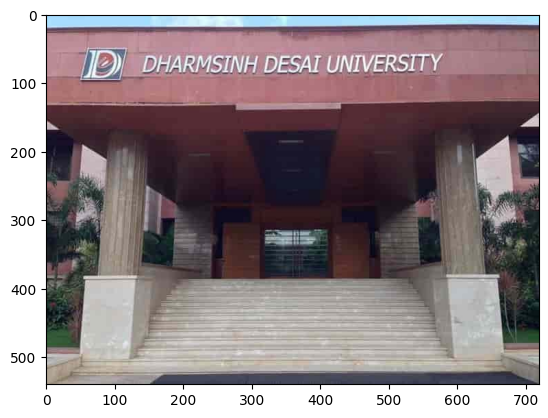

In [ ]:
# Input Image and Reference Text
image_path = '/content/drive/MyDrive/Task5/test_image/ddu_2.jpg'
reference_text = "DHARMSINH DESAI UNIVERSITY"

# Read and process the image
img = cv2.imread(image_path)

# Convert from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Original Image")
plt.imshow(img_rgb)
plt.show()


In [ ]:
# Extract text using OCR
print("Using Tesseract OCR...")
tesseract_text, tesseract_time = extract_text_with_tesseract(image_path)
print(f"Tesseract OCR Text:\n{tesseract_text}")
print(f"Time taken by Tesseract OCR: {tesseract_time:.2f} seconds")


Using Tesseract OCR...
Tesseract OCR Text:

Time taken by Tesseract OCR: 0.31 seconds


In [ ]:
# Extract text using PyOCR
print("\nUsing PyOCR...")
pyocr_text, pyocr_time = extract_text_with_pyocr(image_path)
print(f"PyOCR Text:\n{pyocr_text}")
print(f"Time taken by PyOCR: {pyocr_time:.2f} seconds")



Using PyOCR...
PyOCR Text:

Time taken by PyOCR: 0.17 seconds


In [ ]:
# PaddleOCR
print("\nUsing PaddleOCR...")
paddleocr_text, paddleocr_time = extract_text_with_paddleocr(image_path)
print(f"PaddleOCR Text:\n{paddleocr_text}")
print(f"Time taken by PaddleOCR: {paddleocr_time:.2f} seconds")


Using PaddleOCR...
[2025/01/02 12:28:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_t

In [ ]:
# Accuracy Comparison
print("\nComparison:")
print(f"Tesseract OCR Accuracy: {calculate_accuracy(reference_text, tesseract_text):.2f}")
print(f"PyOCR Accuracy: {calculate_accuracy(reference_text, pyocr_text):.2f}")
print(f"Paddle OCR Accuracy: {calculate_accuracy(reference_text, paddleocr_text):.2f}")



Comparison:
Tesseract OCR Accuracy: 0.00
PyOCR Accuracy: 0.00
Paddle OCR Accuracy: 1.00
